# QuarentenaDados - aula 2

In [3]:
import pandas as pd
filmes = pd.read_csv("/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/movie.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
avaliacoes = pd.read_csv("/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/ratings.csv")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas_medias_por_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={"nota":"nota_media"}).round(2)
filmes_com_media

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


## Desafio 1 do [Guilherme Silveira]  
(https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

Solução: utilização do método xticks do pyplot passando o parâmetro da angulação desejada na rotação.

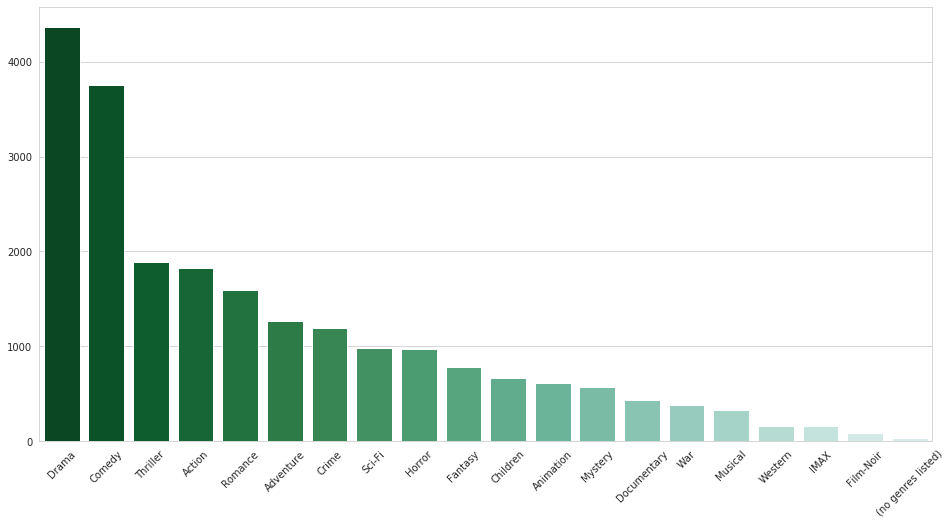

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.xticks(rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [7]:
filmes_com_media.head(100)

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,3.33
96,108,Catwalk (1996),Documentary,4.00
97,110,Braveheart (1995),Action|Drama|War,4.03
98,111,Taxi Driver (1976),Crime|Drama|Thriller,4.11


In [8]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()



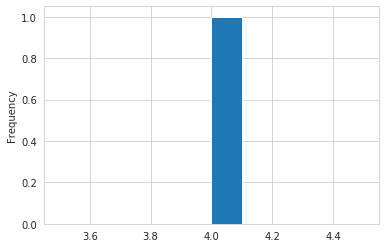

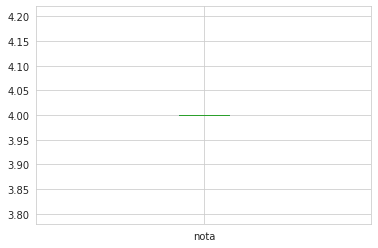

count    1.0
mean     4.0
std      NaN
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: nota, dtype: float64

In [9]:
plot_filme(108)


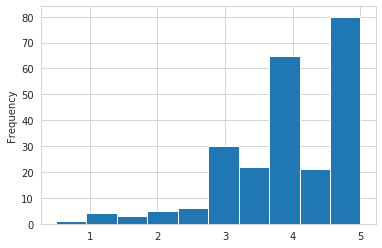

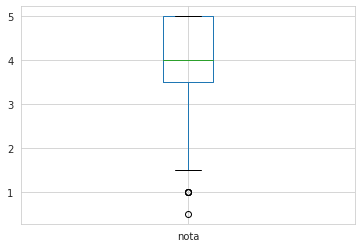

count    237.000000
mean       4.031646
std        0.967726
min        0.500000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [10]:
plot_filme(110)


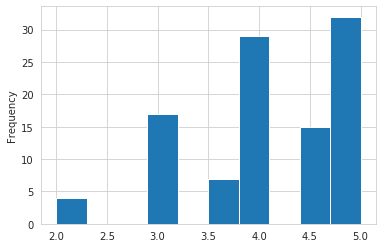

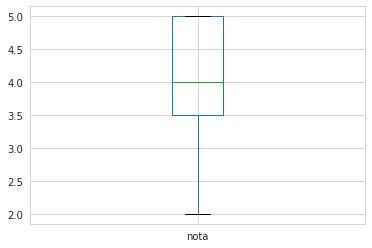

count    104.000000
mean       4.105769
std        0.820470
min        2.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [11]:
plot_filme(111)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.
 
 Solução: ordenando os valores do total de votos no filmes_com_media(na aula 1 utilizamos esse código para contarmos a quantidade de votos) e solicitando para o método head nos dar os 10 primeiros teremos os mais votados. Depois utilizamos o código do guilherme na aula para fazermos os boxplots.

In [12]:
notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media["total_votos"] = notas_por_filme
filmes_com_media.sort_values("total_votos", ascending=False).head(10)

,filmeId,titulo,genero,nota_media,total_votos
356,412,"Age of Innocence, The (1993)",Drama,3.50,329.0
318,360,I Love Trouble (1994),Action|Comedy,2.69,317.0
296,338,Virtuosity (1995),Action|Sci-Fi|Thriller,2.84,307.0
593,735,Cemetery Man (Dellamorte Dellamore) (1994),Horror,3.93,279.0
2571,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,2.69,278.0
260,300,Quiz Show (1994),Drama,3.52,251.0
480,548,Terminal Velocity (1994),Action|Mystery|Thriller,2.75,238.0
110,128,Jupiter's Wife (1994),Documentary,3.00,237.0
589,726,Last Dance (1996),Drama,3.00,224.0
527,616,"Aristocats, The (1970)",Animation|Children,3.41,220.0


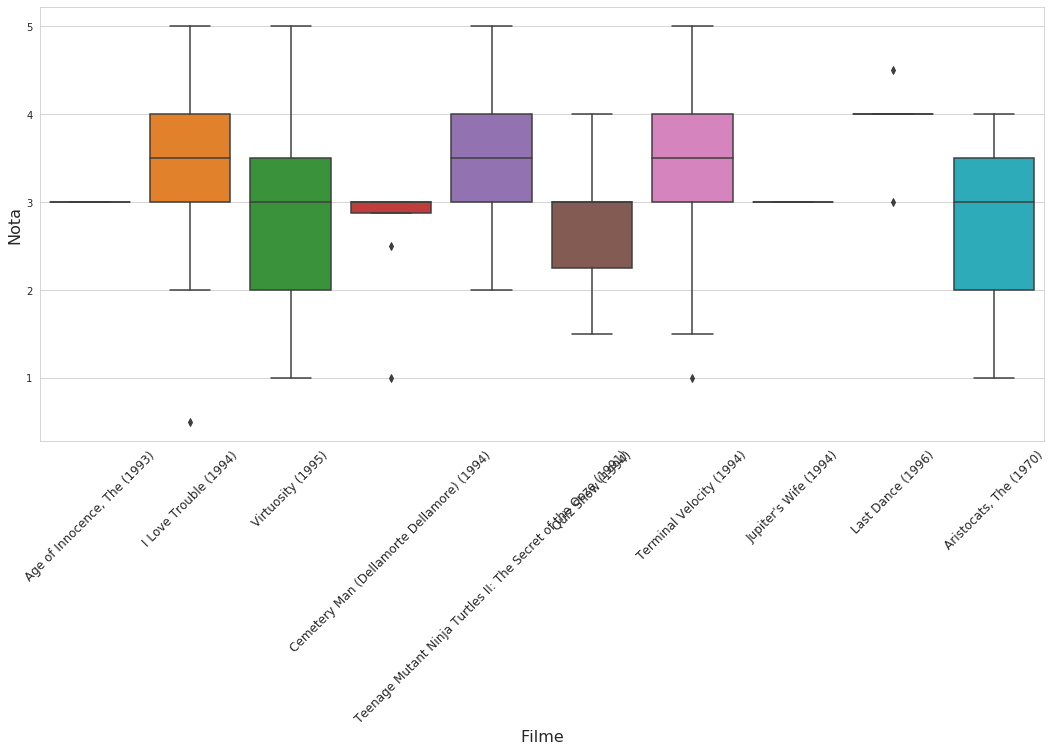

In [17]:
top_10_votos_filme = filmes_com_media.sort_values("total_votos", ascending=False).head(10)
top_10_votos_filme_titulos = top_10_votos_filme["titulo"].to_list()
top_10_votos_filme_ids = top_10_votos_filme["filmeId"].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y="nota", data=avaliacoes.query(f"filmeId in {top_10_votos_filme_ids}"))
ax.set_xticklabels(top_10_votos_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

#sns.set_style("whitegrid")
#plt.subplots(figsize=(14, 8))
#sns.boxplot(data = filmes_com_media.query(
#    "filmeId in [412,360,338,735,3439,300,548,128,726,616]"), 
#            x ="filmeId", y="total_votos")
#plt.xticks(rotation=45)
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

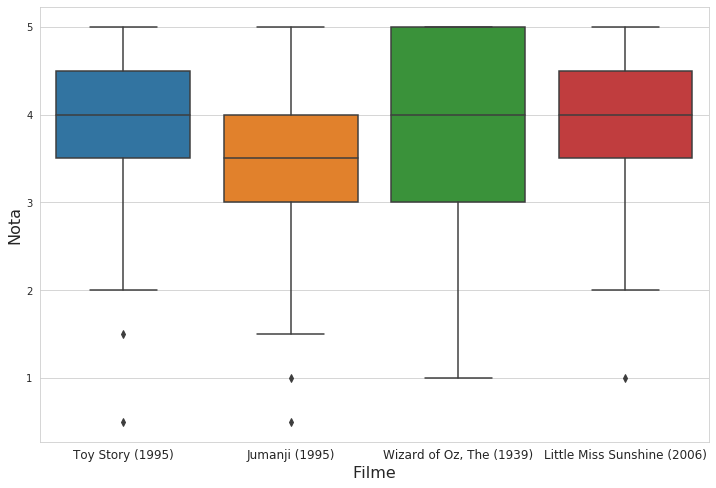

In [21]:
plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota" )
ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()
#plt.xticks(avaliacoes["titulo"], rotation=45)


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [23]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [24]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


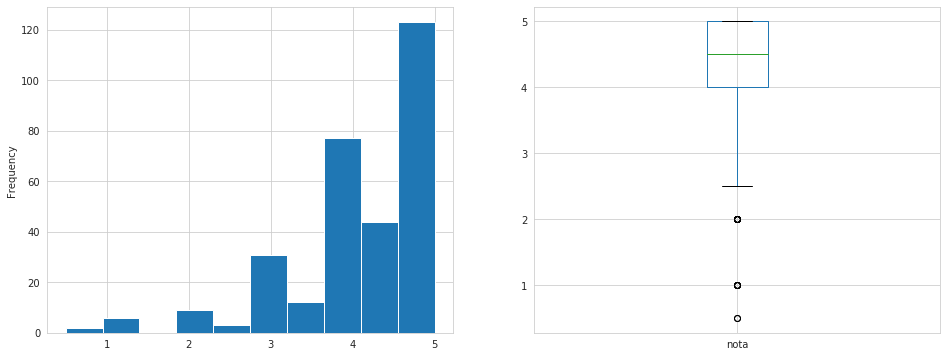

In [25]:
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [27]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,genero,nota_media,total_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,NaN,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,215.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,110.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,52.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,7.0,1995


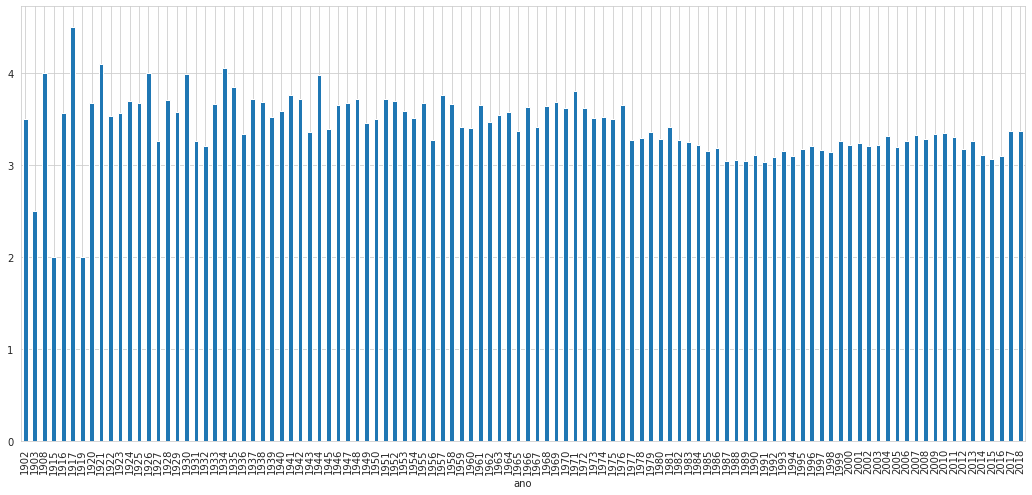

In [29]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot.bar()
plt.xticks(rotation=90)
plt.show()